In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

pd.set_option('display.max_columns', None)

In [16]:
data = pd.read_csv('C:/Users/ivanr/Downloads/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [17]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
data.shape

(9134, 24)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [22]:
data.columns = list(map(lambda x: x.lower().replace(' ', '_'), data.columns))

In [23]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [15]:
data['pvastate'].value_counts()

     89184
P     1380
E        5
Name: pvastate, dtype: int64

In [27]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [28]:
numerical = data.select_dtypes(np.number)

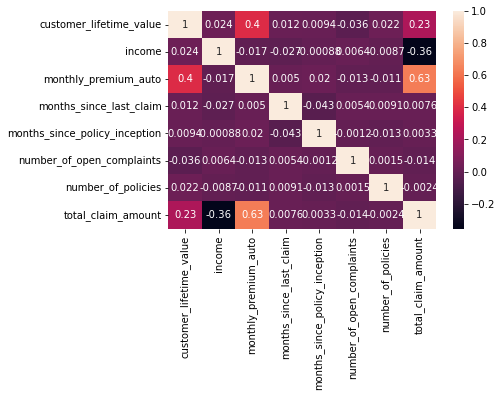

In [30]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

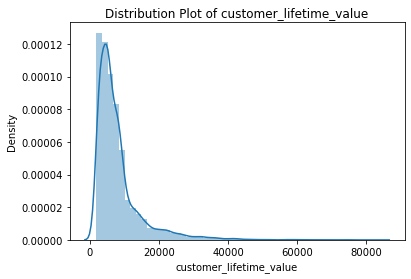

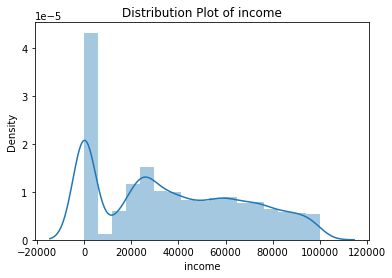

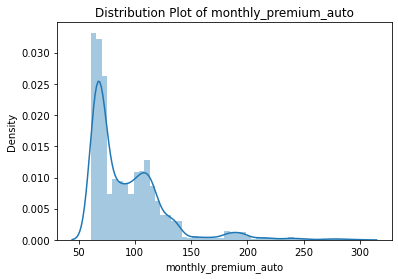

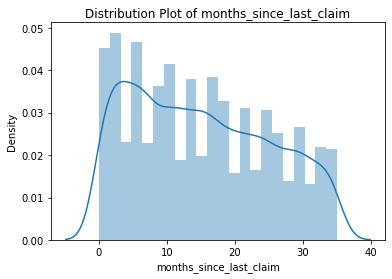

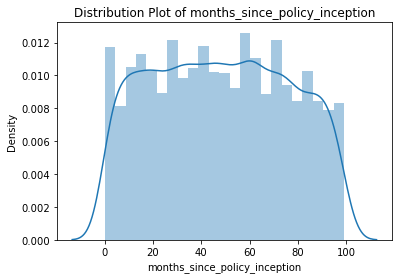

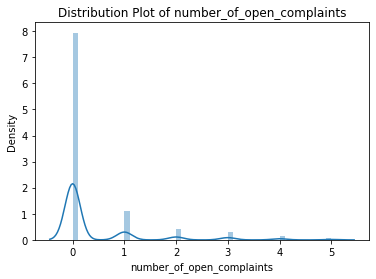

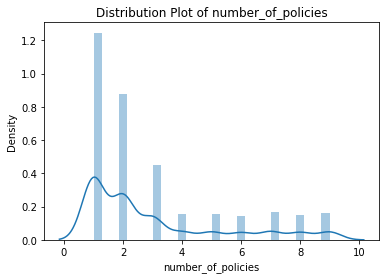

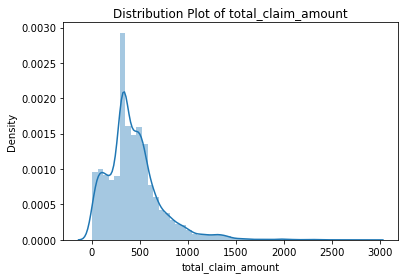

In [51]:
for col in numerical:
    plt.figure()
    sns.distplot(numerical[col])
    plt.title(f"Distribution Plot of {col}")


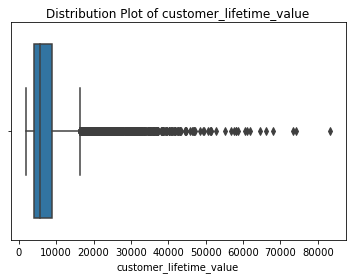

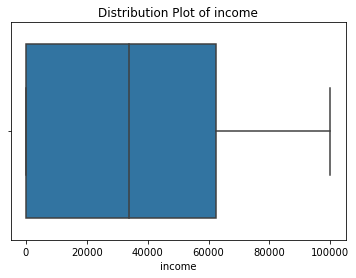

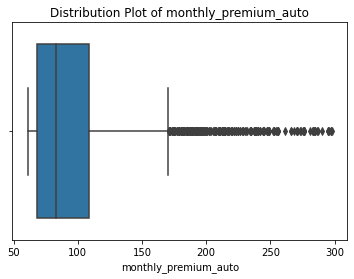

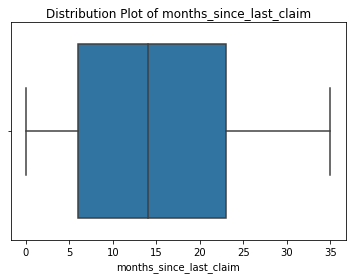

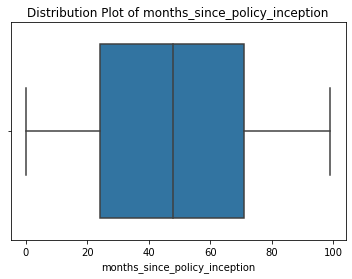

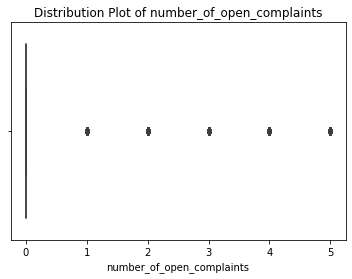

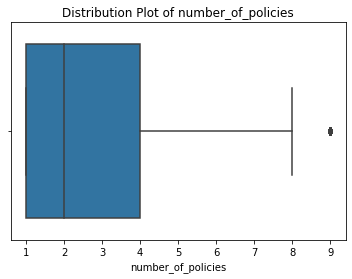

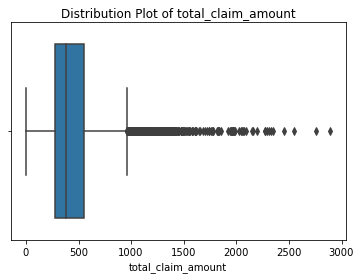

In [52]:
for col in numerical:
    plt.figure()
    sns.boxplot(numerical[col])
    plt.title(f"Distribution Plot of {col}")

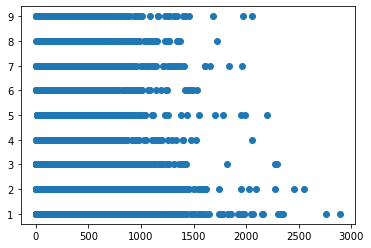

In [55]:
plt.scatter(data['total_claim_amount'], data['number_of_policies'])
plt.show()

In [57]:
categorical = data.select_dtypes(include=['object'])


for col in categorical:
    plt.figure()
    sns.countplot(x=col, data=categorical)
    plt.title(f"Count Plot of {col}")


plt.show()

KeyboardInterrupt: 

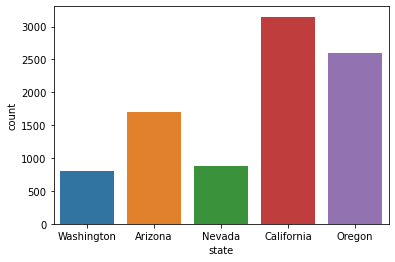

In [58]:
sns.countplot(data['state'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

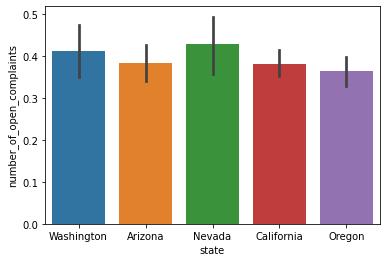

In [62]:
sns.barplot(data['state'], data['number_of_open_complaints'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

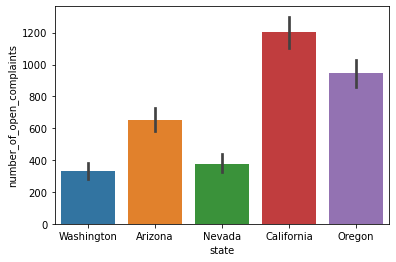

In [63]:
sns.barplot(data['state'], data['number_of_open_complaints'], estimator=sum)
plt.show

In [64]:
data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64